## 의사 결정 트리 모델 학습 및 성능 평가 

##### 학습/평가 데이터 분리

In [ ]:
# 측정 데이터와 레이블(정답) 분리
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1:].values
y = np.where(y =='OK',1,0)
y = y.ravel() # 레이블을 1차원으로 변경함.
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

5586
982
2382
433


In [ ]:
new_y_train = y_train[y_train == 1][:len(y_train[y_train == 0])]
new_y_train = np.concatenate([new_y_train, y_train[y_train == 0]])
new_y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
new_X_train = X_train[y_train == 1][:len(y_train[y_train == 0])]
new_X_train = np.concatenate([new_X_train, X_train[y_train == 0]])
new_X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  0.,   0., 581., 580.],
       [  1.,   1., 521., 303.],
       [  0.,   0., 558., 573.]])

##### 모델 성능 평가 - 1) 분류성능평가지표

> 정량평가: 오차행렬, 정확도, 정밀도, 재현율, F1 score, AUC 살펴보기

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [ ]:
def get_clf_eval(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

> 정성평가: 그래프 살펴보기

In [ ]:
import matplotlib.pyplot as plt
def draw_graph(y_test=None, pred=None):
  plt.figure(figsize=(40, 9))
  plt.plot(y_test, 'b', label = 'actual')
  plt.plot(pred, 'r', label = 'prediction')
  plt.legend()
  plt.show()

  # 따로 보기
  # plt.figure(figsize = (30,6)) # Plotting
  # plt.plot(y_test, 'b', label = 'actual')
  # plt.legend()
  # plt.show()
  # plt.figure(figsize=(30, 6))
  # plt.plot(pred, 'r', label = 'prediction')
  # plt.legend()
  # plt.show()

##### 모델 성능 평가 -2) ROC curve와 case별로 살펴보기 

In [ ]:
def get_eval_2(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  TN = confusion[0][0]
  FP = confusion[0][1]
  FN = confusion[1][0]
  TP = confusion[1][1]
  print("📌실제 불량일 때 불량으로 판별할 확률\n= P(실제불량)∩P(에측불량)/P(실제불량): {:.4f}".format(TN/(TN+FP)))
  #print("📌실제 불량일 때 양품으로 판별할 확률\n= P(실제불량)∩P(에측양품)/P(실제불량): {:.4f}".format(FP/(TN+FP)))
  #print("📌실제 양품일 때 불량으로 판별할 확률\n= P(실제양품)∩P(에측불량)/P(실제양품): {:.4f}".format(FN/(FN+TP)))
  print("📌실제 양품일 때 양품으로 판별할 확률\n= P(실제양품)∩P(에측양품)/P(실제양품): {:.4f}".format(TP/(FN+TP)))

  roc_auc = roc_auc_score(y_test, pred)
  print('ROC_AUC:{:.4f}'.format(roc_auc))
  return(TN/(TN+FP),TP/(FN+TP),roc_auc)

##### 모델 학습 및 성능 평가

In [ ]:
depth = 50 # 변경해보기
dt_clf = DecisionTreeClassifier(max_depth = depth) # 의사결정트리 알고리즘 불러오기
dt_clf = dt_clf.fit(X_train, y_train) # 모델에 데이터 학습시키기
dt_prediction = dt_clf.predict(X_test) # 데이터 예측하기
# 성능평가
get_clf_eval(y_test, dt_prediction)
get_eval_2(y_test, dt_prediction)

오차 행렬
[[ 428    5]
 [   6 2376]]
정확도:  0.9961, 정밀도:  0.9979, 재현율:  0.9975, F1:  0.9977, AUC: 0.9930
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9885
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9975
ROC_AUC:0.9930


(0.9884526558891455, 0.9974811083123426, 0.9929668821007441)

In [ ]:
for i in range(len(dt_prediction)):
  if (dt_prediction[i]!=y_test[i]):
    print(X_test[i])
    print(y_test[i], dt_prediction[i])

[  1.   1. 629. 587.]
1 0
[  1.   1. 583. 621.]
1 0
[  1.   1. 611. 609.]
0 1
[  1.   1. 612. 609.]
0 1
[  1.   1. 550. 399.]
0 1
[  1.   1. 623. 582.]
1 0
[  1.   1. 608. 608.]
0 1
[  0.   0. 554. 567.]
1 0
[  0.   0. 558. 559.]
1 0


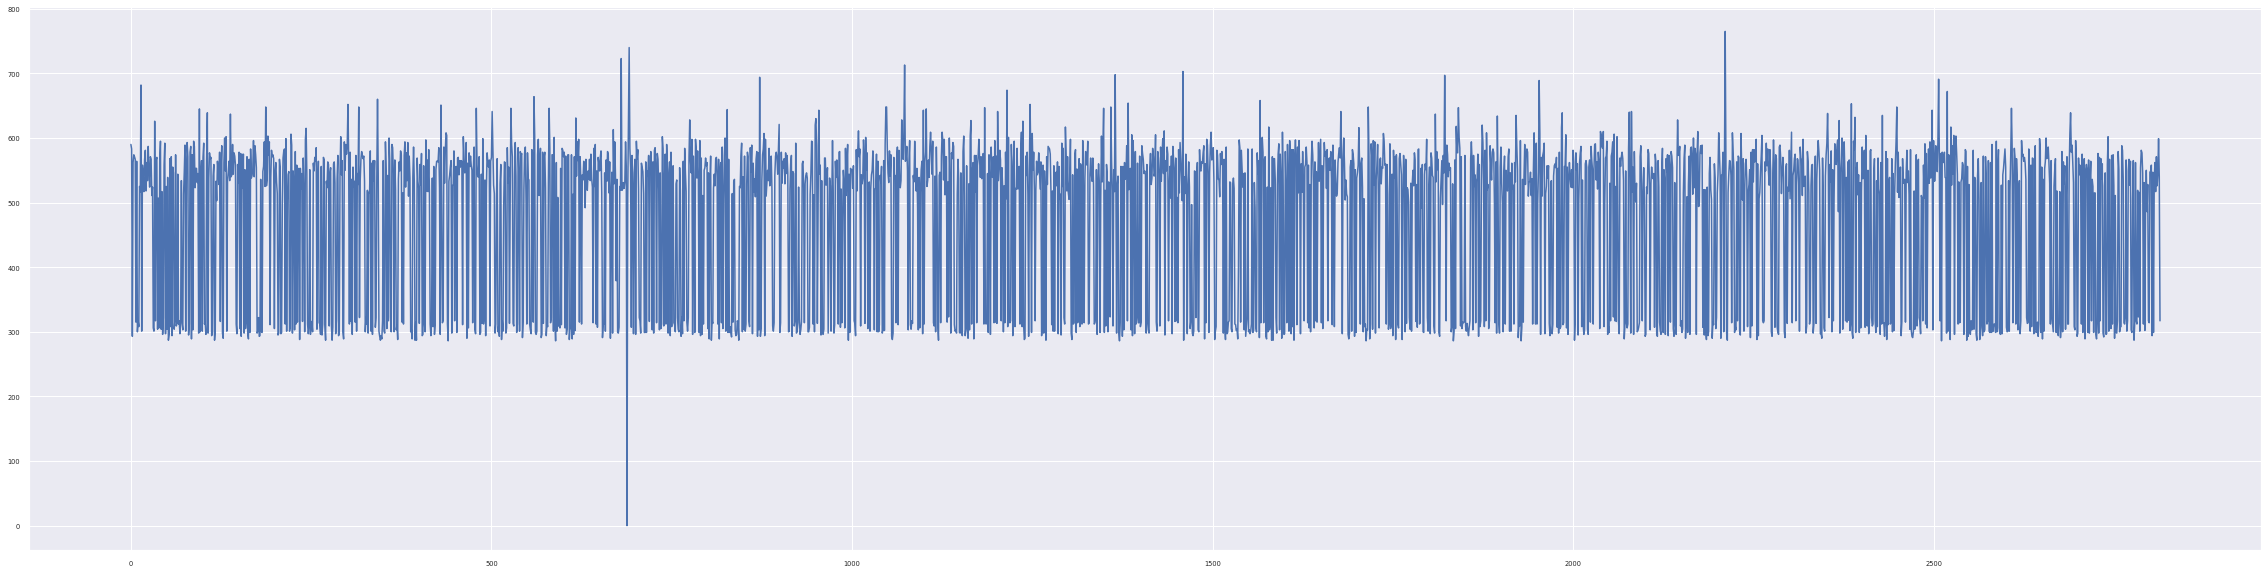

In [ ]:
hi = []
plt.figure(figsize=(40,10))
for i in range(len(X_test)):
  hi.append(X_test[i][3])
plt.plot(hi)

In [ ]:
Pa_arr = []
Pd_arr = []
Proc_arr = []
for d in range(3,101):
  dt_clf = DecisionTreeClassifier(max_depth = d ) # 의사결정트리 알고리즘 불러오기
  dt_clf = dt_clf.fit(X_train, y_train) # 모델에 데이터 학습시키기
  dt_prediction = dt_clf.predict(X_test) # 데이터 예측하기
  # 성능평가
  print("---------------------depth가",d,"일 때-----------------------")
  get_clf_eval(y_test, dt_prediction)
  Pa, Pd, Proc = get_eval_2(y_test, dt_prediction)
  Pa_arr.append(Pa)
  Pd_arr.append(Pd)
  Proc_arr.append(Proc)

---------------------depth가 3 일 때-----------------------
오차 행렬
[[ 237  196]
 [   1 2381]]
정확도:  0.9300, 정밀도:  0.9239, 재현율:  0.9996, F1:  0.9603, AUC: 0.7735
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.5473
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9996
ROC_AUC:0.7735
---------------------depth가 4 일 때-----------------------
오차 행렬
[[ 238  195]
 [   1 2381]]
정확도:  0.9304, 정밀도:  0.9243, 재현율:  0.9996, F1:  0.9605, AUC: 0.7746
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.5497
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9996
ROC_AUC:0.7746
---------------------depth가 5 일 때-----------------------
오차 행렬
[[ 423   10]
 [  19 2363]]
정확도:  0.9897, 정밀도:  0.9958, 재현율:  0.9920, F1:  0.9939, AUC: 0.9845
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9769
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9920
ROC_AUC:0.9845
---------------------depth가 6 일 때-----------------------
오차 행렬
[[ 424    9]
 [  16 2366]]
정확도:  0.9911, 정밀도:  0.9962, 재현율:  0.9933, F1:  0.9947, AUC

In [ ]:
print(Pa_arr)
print(Pd_arr)
print(Proc_arr)

[0.5473441108545035, 0.5496535796766744, 0.976905311778291, 0.9792147806004619, 0.976905311778291, 0.9838337182448037, 0.9861431870669746, 0.9884526558891455, 0.9884526558891455, 0.9907621247113164, 0.9907621247113164, 0.9884526558891455, 0.9907621247113164, 0.9907621247113164, 0.9907621247113164, 0.9884526558891455, 0.9884526558891455, 0.9907621247113164, 0.9884526558891455, 0.9907621247113164, 0.9884526558891455, 0.9884526558891455, 0.9907621247113164, 0.9884526558891455, 0.9884526558891455, 0.9884526558891455, 0.9884526558891455]
[0.9995801847187238, 0.9995801847187238, 0.9920235096557515, 0.9932829554995802, 0.9970612930310663, 0.9962216624685138, 0.9979009235936188, 0.9974811083123426, 0.9974811083123426, 0.9979009235936188, 0.9979009235936188, 0.9974811083123426, 0.9979009235936188, 0.9979009235936188, 0.9979009235936188, 0.9974811083123426, 0.9974811083123426, 0.9979009235936188, 0.9974811083123426, 0.9979009235936188, 0.9974811083123426, 0.9974811083123426, 0.9979009235936188, 

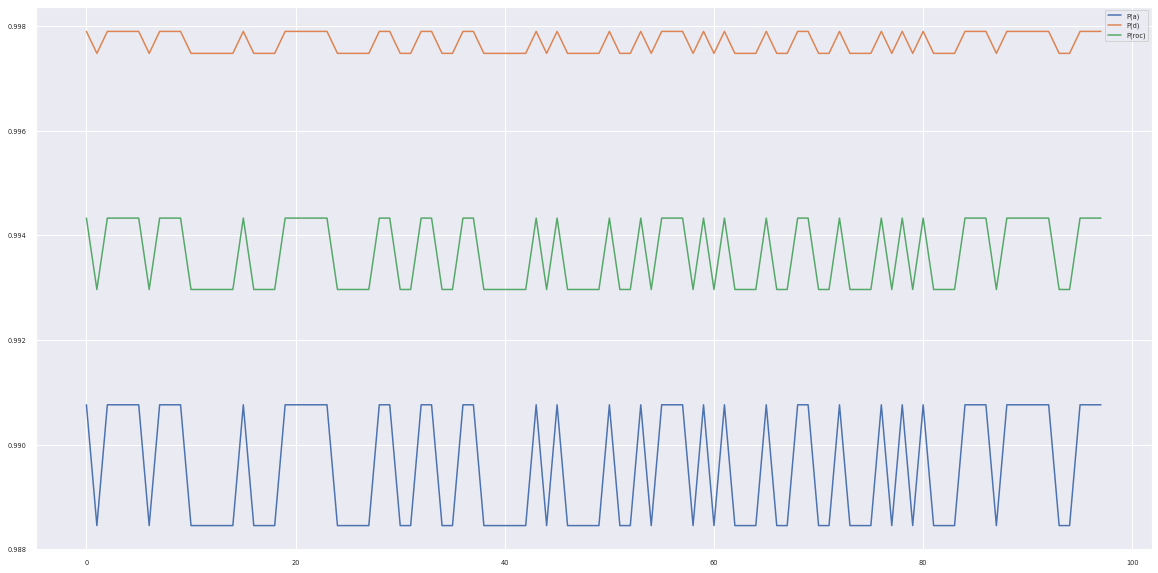

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(Pa_arr, label = 'P(a)')
plt.plot(Pd_arr, label = 'P(d)')
plt.plot(Proc_arr, label = 'P(roc)')
plt.legend()

오차 행렬
[[ 423   10]
 [  19 2363]]
정확도:  0.9897, 정밀도:  0.9958, 재현율:  0.9920, F1:  0.9939, AUC: 0.9845
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9769
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9920
ROC_AUC:0.9845


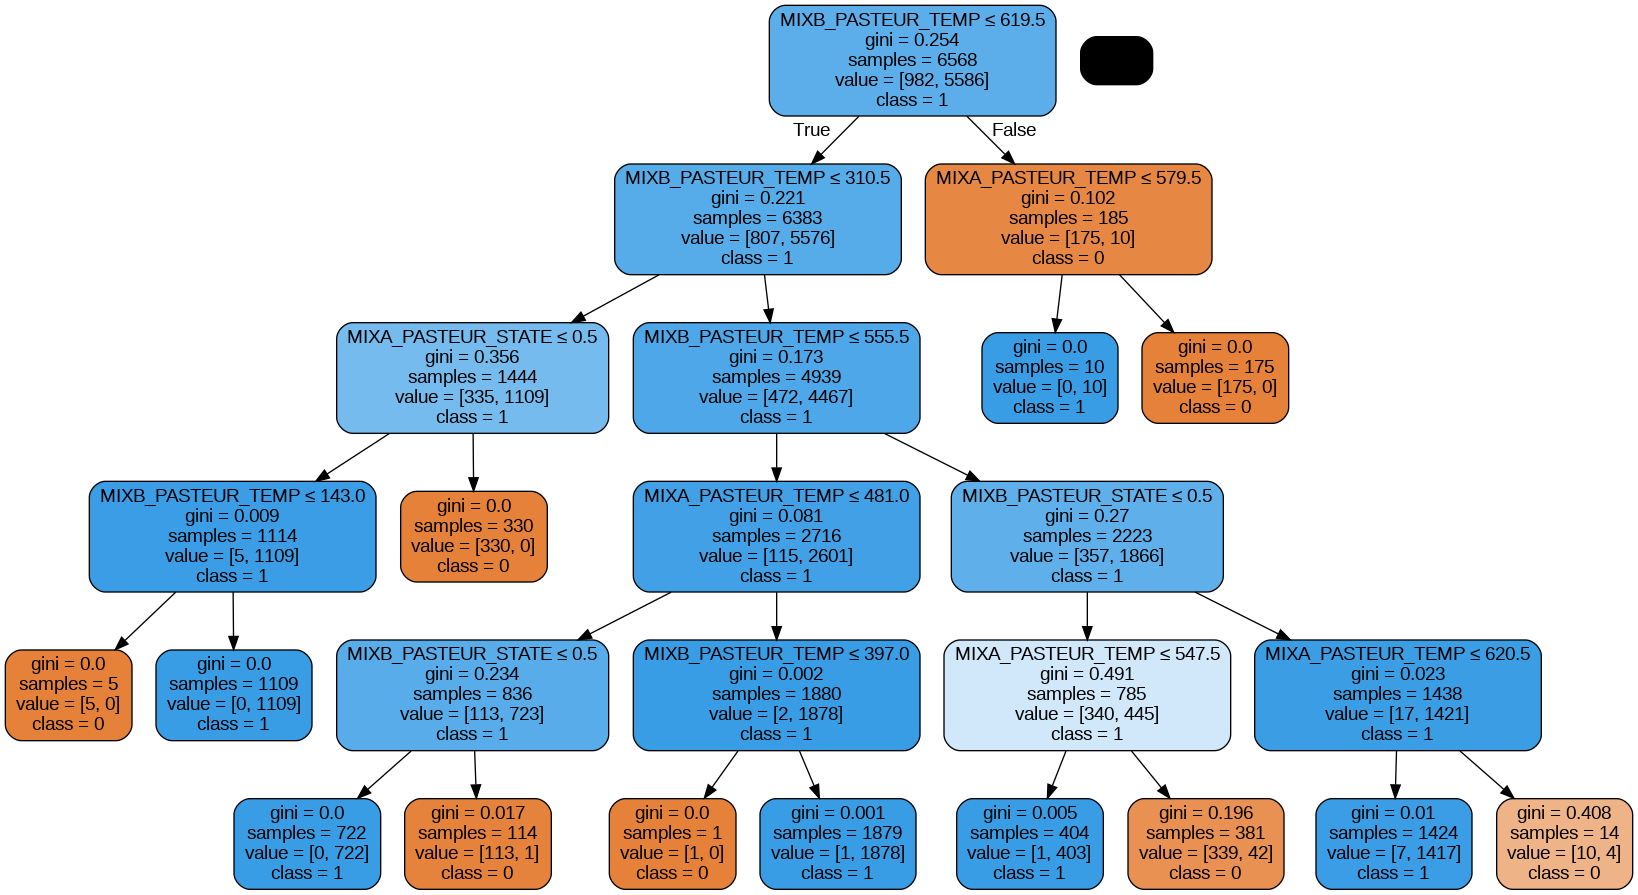

In [ ]:
depth = 5 # 변경해보기
dt_clf = DecisionTreeClassifier(max_depth = depth) # 의사결정트리 알고리즘 불러오기
dt_clf = dt_clf.fit(X_train, y_train) # 모델에 데이터 학습시키기
dt_prediction = dt_clf.predict(X_test) # 데이터 예측하기
# 성능평가
get_clf_eval(y_test, dt_prediction)
get_eval_2(y_test, dt_prediction)
# 시각화를 위한 사전 작업
feature_names = df.columns.tolist()
feature_names = feature_names[1:5]
target_name = np.array(['0','1'])
# Graphviz로 시각화하기
dt_dot_data = tree.export_graphviz(dt_clf,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

> 예측 결과 그래프로 보기

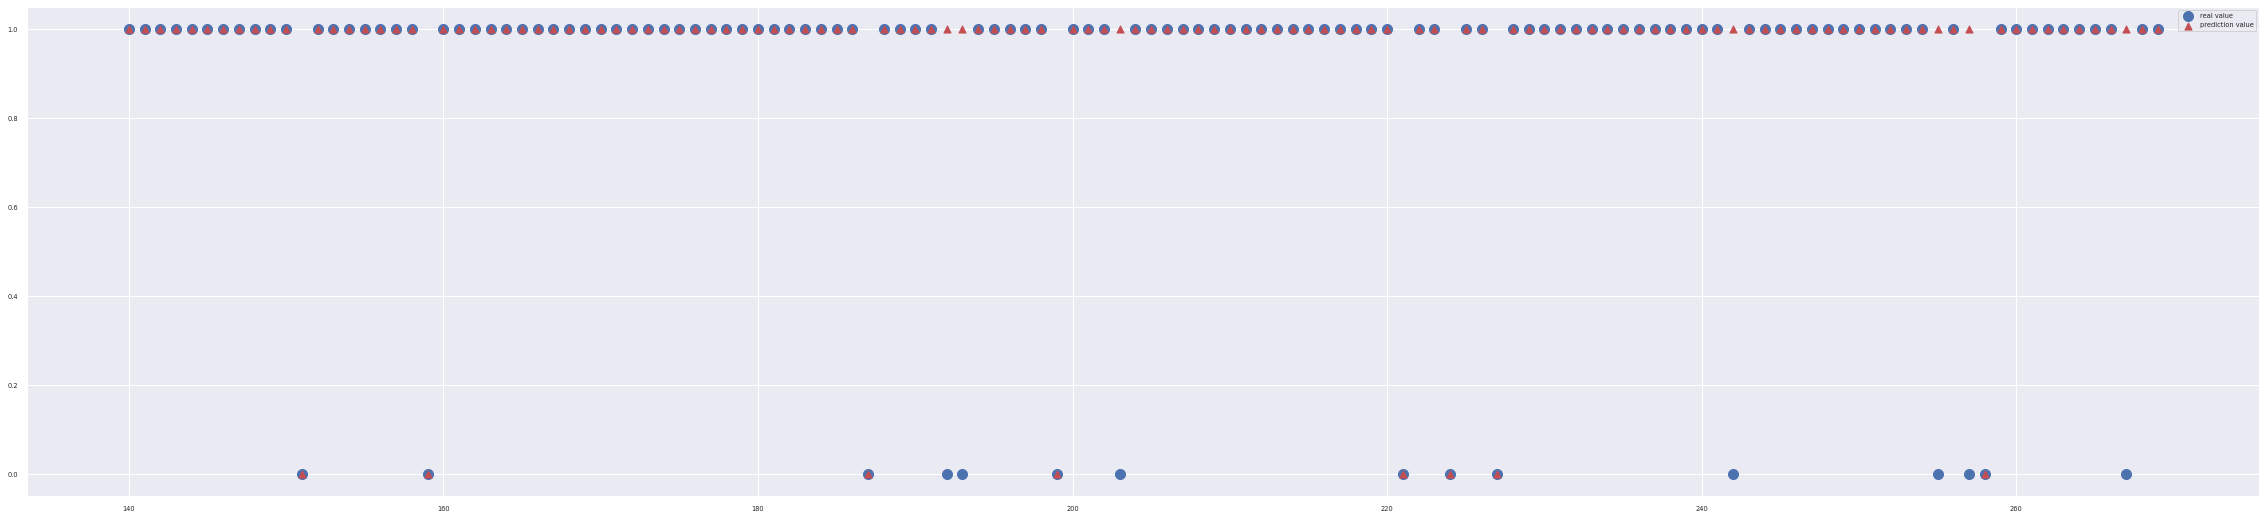

In [ ]:
arr = np.array([])
for i in range(len(y_test)):
  if y_test[i]!=dt_prediction[i]:
    arr = np.append(arr, np.array([0]))
  else:
    arr = np.append(arr, np.array([1]))

fig = plt.figure(figsize=(40,9))
arr2 = np.arange(len(y_test))
plt.scatter(arr2[140:270],y_test[140:270],c='b',s=100, label="real value")
plt.scatter(arr2[140:270],dt_prediction[140:270],c='r',marker='^', s=50, label="prediction value")
plt.grid(True)
plt.legend()
    